# Electrical Power Generation
**2021-03-14**

Notebook created by **Arthur Verrez** for the course of *Optimisation Combinatoire et Stochastique* at MINES ParisTech, PSL University.


# 1: Basic problem description & notation

#### Basic definition of the problem
**Periods**

Let's define $p\in \{0,...,P\}$ the different time period indices and $\Delta p \in \mathbb{N}$ the duration of each of those periods in hours.

For each of those periods, we define a demand in power noted $D_p \in \mathbb{R}_{+}$ (in MW).


**Power generation units**

All the power generation units are grouped by types noted $t\in T$. Let's note $N_t \in \mathbb{N}$ the total number of units by type.

If a unit of type $t$ is on during the period $p$, then its power output is contant during a period and has a value between $\underline{L_t}\in \mathbb{R}_{+}$ and $\overline{L_t}\in ]\underline{L_t}, +\infty [$ (both in MW).




**Costs**

Each power generation unit type has two types of costs:
$C_{t}^{b} \in \mathbb{R}_{+}$ (in euro/hour) to operate the unit at its minimum power output, and $C_{t}^{r} \in \mathbb{R}_{+}$ to generate additional MWh (in euro/MWh).

#### Definition of the model 2.1.1
Let's note $x_{t,i}^{p}\in \{0,1\}$ the binary variable that defines if the $i^{th}$ unit of type $t$ is on or off at the period $p$ and $x_{t}^{p}:=\sum\limits_{i=0}^{N_{t}} x_{t,i}^{p}$, the number of units of type $t$ on at the period $p$.

Let's note $l_{t,i}^{p}$ the additional MW generated by said unit at the period $p$ and $l_{t}^{p}:=\sum\limits_{i=0}^{N_{t}} l_{t,i}^{p}$, the total additional MW generated by all the units of type $t$ at the period $p$.

We can therefore define the output power by type $t$ and period $p$:
$o_t^p:= \Delta_p(\underline{L_t}\times x_{t}^{p}+ l_{t}^{p})$ and $o^p:=\sum\limits_{t\in T} \Delta_p(\underline{L_t}\times x_{t}^{p}+ l_{t}^{p})$


Let's note $c_{t,i}^{p}$ the cost of running the $i^{th}$ unit of type $t$ during the period $p$, we have
$c_{t,i}^{p}=\Delta_p( x_{t,i}^{p}\times C_{t}^{b} + l_{t,i}^{p}\times C_{t}^{r})$
and
$c_t^{p}:=\sum\limits_{i=0}^{N_t}\Delta_p( x_{p}^{t,i}\times C_{b}^{t} + l_{p}^{t,i}\times C_{r}^{t})
=\Delta_p(x_{p}^{t}\times C_{b}^{t} + l_{p}^{t}\times C_{r}^{t})$
the total cost of the units of type $t$ at the period $p$.

#2: Discrete Optimization

## 2.1: Modelling (un)differentiated units


### Question 2.1.1


**Constraints**

We have the following constraints, based on binary and continuous variables:


(C1) $\forall t \in T, \forall (i,p)\in N_{t}\times [\![ 0, P ]\!]:  0 \leq l_{t,i}^{p} \leq (\overline{L_t}-\underline{L_t})x_{t,i}^{p}$


(C2) $\forall p \in [\![ 0, P ]\!]:\sum\limits_{i=0}^{N_{t}}\underline{L_t}\times  x_{t,i}^{p}+ l_{t}^{p}$

(C3) $\forall (t,p) \in T\times [\![ 0, P ]\!]:  0 \leq \sum\limits_{i=0}^{N_{t}} x_{t,i}^{p} \leq N_t$



**The objective**

The objective is to minimize the following expression:

(O1) $\sum\limits_{t\in T}\sum\limits_{p=0}^P c_t^{p}=\sum\limits_{t\in T}\sum\limits_{p=0}^P\Delta_p(\sum\limits_{i=0}^{N_t}(x_{p}^{t,i})\times C_{b}^{t} + l_{p}^{t}\times C_{r}^{t})$




### Question 2.1.2

This model is extremely similar to  the first one, with an added assumption, using the same conventions as in the question 2.1.1, we can express it as:
$ \forall (p,t)\in [\![ 0, P ]\!]\times T, \exists K_t^{p}\in \mathbb{R}_{+} / \forall i \in [\![ 0, N_t ]\!]$, if $ x_{t,i}^{p}=1 $ then $l_{t,i}^{p}=K $


We can therefore rewrite the constraints as following:

**Constraints**

(C1.2)
$\forall (t,p) \in T \times [\![ 0, P ]\!]:  0 \leq l_{t}^{p} \leq (\overline{L_t}-\underline{L_t})x_{t}^{p}$

(C2) $ \forall p \in [\![ 0, P ]\!]: o_p \geq \Delta_p D_p$

(C3) $\forall (t,p) \in T\times [\![ 0, P ]\!]:  0 \leq x_{t}^{p} \leq N_t$



**The objective**

The objective is to minimize the following expression:

(O1) $\sum\limits_{t\in T}\sum\limits_{p=0}^P c_t^{p}=\sum\limits_{t\in T}\sum\limits_{p=0}^P\Delta_p(x_{p}^{t}\times C_{b}^{t} + l_{p}^{t}\times C_{r}^{t})$


### Question 2.1.3

The model 2.1.1 is a relaxation of the model 2.1.2 because the model 2.1.2 adds the constraint that all the committed units of a same type operate with the same power output, which is not a constraint present in the model 2.1.1.

But in reality, both models are identical in the sense that both model will produce the same objective cost.

#### Proof

The model 2.1.1 being a relaxation of the model 2.1.2, the space of solutions of the model 2.1.2 is included in the space of solutions of the model 2.1.1.

That means that the optimal solution for the model 2.1.2 will be a solution for the model 2.1.1, which directly implies that the optimal solution for the model 2.1.1 is better or as good as the optimal solution for the model 2.1.2.

Let's take, for a given problem, the optimal solution of the model 2.1.1 and create a solution that satisfies the conditions of the model 2.1.2, the solution will then be optimal for the model 2.1.2 and we will have shown the fact that both model are identical.

The optimal solution for the model 2.1.1 is caracterised by $l_{t,i}^{p}$ and $x_{t,i}^{p}$ for all relevant $p$, $t$ and $i$.

If $ \forall (p,t)\in [\![ 0, P ]\!]\times T, \exists K_t^{p}\in \mathbb{R}_{+} / \forall i \in [\![ 0, N_t ]\!]$, if $ x_{t,i}^{p}=1 $ then $l_{t,i}^{p}=K $, then this solution is already valid for the model 2.1.2.

Else, we create a solution with the same $ x_{t,i}^{p} $ and for all $p$ and $t$, we define:

$\widetilde{l_t^p}=  \begin{cases}
               0 \text{ if } \sum\limits_{i=0}^{N_t} x_{t,i}^{p} = 0\\
               \frac{\sum\limits_{i=0}^{N_t} l_{t,i}^{p}}{\sum\limits_{i=0}^{N_t} x_{t,i}^{p}}  \text{ otherwise }
               
            \end{cases}
$

It is trivial to verify that a solution caracterised by the given $ x_{t,i}^{p} $ and $\widetilde{l_t^p}$ outputs the same power for each $t$ and each $p$ as the optimal solution of the model 2.1.1, and it is therefore also optimal. But this solution also verifies the conditions of the model 2.1.2.

Which concludes the proof.


##2.2: Additional Models

### Question 2.2.1

With a reserve factor $F\in [0,1]$ denoting the **additional** possible demand, it simply adds a constraint that is the following:

(C4) $\forall p \in [\![ 0, P ]\!]:  \sum\limits_{t\in T}\overline{L_t}\times x_{t}^{p} \geq (1+F) \times D_p$

### Question 2.2.2

Considering for a given type $t$, $A_t \in \mathbb{N}$ the number of units of this type that is already on at time 0 and a startup cost $C_t^s \in \mathbb{R}^{+}$ (in euros) of transitioning a unit from off to on, the only thing that changes is the objective.

We have to add the cost of starting up machines.
This one is equal to:
$C_t^s\sum\limits_{t\in T}(max(x_t^0-A_t,0) + \sum\limits_{p=1}^P  max(x_t^{p}-x_t^{p-1},0))$


The final objective to minimize therefore becomes:

(O2) $\sum\limits_{t\in T}\sum\limits_{p=0}^P c_t^{p}+C_t^s\sum\limits_{t\in T}(max(x_t^0-A_t,0) + \sum\limits_{p=1}^P max(x_t^{p}-x_t^{p-1},0))$




### Question 2.2.3

The hydropower generation changes a lot of parts of the models.
We'll consider that for our use case, the available reservoirs of the hydroelectric will never be entirely depleted.

Let's note $y_h^p$ the binary variable being equal to 1 if the $h$ hydro power unit is on at the period $p$ and otherwise 0.

**Regarding the constraints**

The power output can be re-written as $o^p:=\sum\limits_{t\in T} \Delta_p(\underline{L_t}\times x_{t}^{p}+ l_{t}^{p})+\sum\limits_{h\in H} \Delta_p(L_h\times y_{h}^{p})$

We now have to take into account the power consumption of pumping back the water into the reservoirs. We will consider that pumping back the water into the reservoir can be done during the same period as the usage for simplification reasons.

The depletion of water at period $p$ will be equal to:
$\sum\limits_{h\in H} R_h\times y_{h}^{p}$ meters/hour.

Therefore, the power needed to pump back the water per hour will be:
$w_p:=E\sum\limits_{h\in H} R_h\times y_{h}^{p}$.

The constraint 2, with the updated $o_p$, becomes:

(C2.3) $ \forall p \in [\![ 0, P ]\!]: o_p \geq \Delta_p(D_p + w_p)$

Furthermore, all hydroelectric units participate to the reserve, therefore, constraint 4 becomes:

(C4.3) $\forall (t,p) \in T\times [\![ 0, P ]\!]:  \sum\limits_{t\in T}\overline{L_t}\times x_{t}^{p} + \sum\limits_{h\in H} L_h\geq (1+F) \times D_p$

**Regarding the objectives**

We have to take into account the costs of the hydroelectric units.

The operation cost at each period $p$:

$\Delta_p\sum\limits_{h\in H}  y_{h}^{p}\times C_h^b$


The startup costs on all periods will be (considering that no hyroelectric plant is turned on in the beginning):

$C_h^s\sum\limits_{h\in H}\sum\limits_{p=1}^P max(y_h^{p}-y_h^{p-1},0)$

The objective will therefore be to minimize the following expression:


(O3) $\sum\limits_{t\in T}\sum\limits_{p=0}^P c_t^{p}+C_t^s\sum\limits_{t\in T}(max(x_t^1-A_t,0) + \sum\limits_{p=1}^P \times max(x_t^{p}-x_t^{p-1},0))+C_h^s\sum\limits_{h\in H}\sum\limits_{p=1}^P (max(y_h^{p}-y_h^{p-1},0)+\Delta_p  y_{h}^{p}\times C_h^b)$


##2.3: Implementation

### 2.3.0 General set up

In [ ]:
# Installation of Gurobi
!pip install -i https://pypi.gurobi.com gurobipy

Looking in indexes: https://pypi.gurobi.com


In [ ]:
# Importing the libraries we'll use
import numpy as np
import pandas as pd

import gurobipy as gp
from gurobipy import GRB, max_

In [ ]:
# Defining the inputs of the problem
# Names are self explanatory


n_units_by_type= [12, 10, 5]

n_power_types= len(n_units_by_type)

min_power_by_type= [850, 1250, 1500] # in MW

max_power_by_type= [2000, 1750, 4000] # in MW

base_cost_by_type= [1000, 2600, 3000] # in euro/hour

per_mw_cost_by_type= [2, 1.3, 3] # in euro/MW

max_units_by_type=max(n_units_by_type)


power_demand_by_period= [15000, 30000, 25000, 40000, 27000] # in MW

period_durations= [6, 3, 6, 3, 6] # in hours

n_periods= len(period_durations)

#For section 2.3
min_down_time = [9,9,9]
min_up_time = [9,9,9]
max_ramp_down = [800,1200,1700]
max_ramp_up = [800,1200,1700]
max_switch_on = [1000,1500,2000]
max_switch_off = [1000,1500,2000]

# For question 2.2.1
reserve_factor = 0.15

#For question 2.2.1

startup_cost_by_type = [2000, 1000, 500]
initial_units_on_by_type=[0,0,0]

#For question 2.2.3
n_hydro_units = 2
hydro_load = [900, 1400]
hydro_cost = [90, 150]
hydro_height_reduction = [0.31, 0.47]
hydro_startup_cost = [1500, 1200]
pumping_consumption=3000 #in MWh/meter of height





### Question 2.3.1 (Model 1)

In [ ]:
# Definition of the model 1

model_1 = gp.Model('PowerGenerationModel1')


# Definition of the variables

# A 2 dimensional array that gives by type and period the integer correponding to the number of units on
max_units_every_type=max(n_units_by_type)

units_on=model_1.addVars(n_power_types, n_periods, max_units_every_type, vtype=GRB.BINARY, name="units_on")

# A 2 dimensional array that gives the power generated at given period
gen_power = model_1.addVars(n_power_types, n_periods, vtype=GRB.CONTINUOUS, name="gen_power")


# Definition of the constraints

# The maximum number of units on at a given time (C3)
max_units_on_contr = model_1.addConstrs(gp.quicksum(units_on[type_id, period_id, unit_id] for unit_id in range(max_units_every_type)) <= n_units_by_type[type_id]
                        for type_id in range(n_power_types) for period_id in range(n_periods))

# Additional constraint due to the definition of gen_power to insure it produces at least the base power per unit
min_gen_power_constr = model_1.addConstrs((gen_power[type_id, period_id] >= min_power_by_type[type_id] * gp.quicksum(units_on[type_id, period_id, unit_id] for unit_id in range(max_units_every_type)))
                              for type_id in range(n_power_types) for period_id in range(n_periods))

# The maximum power output given the units on at a given period, equivalent to (C1.2)
max_gen_power_constr = model_1.addConstrs((gen_power[type_id, period_id] <= max_power_by_type[type_id] * gp.quicksum(units_on[type_id, period_id, unit_id] for unit_id in range(max_units_every_type)))
                              for type_id in range(n_power_types) for period_id in range(n_periods))

# Constraint to meet the demand in power (C2)
meet_demand_constr = model_1.addConstrs(gp.quicksum(gen_power[type_id, period_id]
                                                  for type_id in range(n_power_types))
                                                  >= power_demand_by_period[period_id]
                                                  for period_id in range(n_periods))

# Definition of the costs
base_cost = gp.quicksum(base_cost_by_type[type_id]*period_durations[period_id]*gp.quicksum(units_on[type_id, period_id, unit_id] for unit_id in range(max_units_every_type))
                    for type_id in range(n_power_types) for period_id in range(n_periods))

additional_cost = gp.quicksum(per_mw_cost_by_type[type_id]*(gen_power[type_id,period_id] - min_power_by_type[type_id]*gp.quicksum(units_on[type_id, period_id, unit_id] for unit_id in range(max_units_every_type)))*period_durations[period_id]
                      for type_id in range(n_power_types) for period_id in range(n_periods))

# Setting the objective for the model
model_1.setObjective(base_cost+additional_cost)

In [ ]:
model_1.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 50 rows, 195 columns and 585 nonzeros
Model fingerprint: 0xfb5006c2
Variable types: 15 continuous, 180 integer (180 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [4e+00, 9e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+04]
Found heuristic solution: objective 1294050.0000
Presolve removed 43 rows and 189 columns
Presolve time: 0.01s
Presolved: 7 rows, 6 columns, 15 nonzeros
Found heuristic solution: objective 1011000.0000
Variable types: 0 continuous, 6 integer (0 binary)

Root relaxation: objective 9.780000e+05, 3 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 978000.000    0    1 1011000.00 978000.000  3.26%     -    0s
H    0     0

In [ ]:
periods_info=[]
for p in range(n_periods):
  periods_info.append({})
  cost_additional=0
  cost_base=0
  total_gen_power=0
  for t in range(n_power_types):
    periods_info[p]["Power type "+str(t)]=gen_power[t,p].x
    periods_info[p]["N units on "+str(t)]=sum(units_on[t,p,i].x for i in range(max_units_every_type))
    total_gen_power+=gen_power[t,p].x
    cost_additional+=per_mw_cost_by_type[t]*(gen_power[t,p].x - min_power_by_type[t]*sum(units_on[t,p,i].x for i in range(max_units_every_type)))*period_durations[p]
    cost_base+=base_cost_by_type[t]*period_durations[p]*sum(units_on[t,p,i].x for i in range(max_units_every_type))

  periods_info[p]["Total gen power"]=total_gen_power
  periods_info[p]["Demand"]=power_demand_by_period[p]
  periods_info[p]["Cost Base"]=cost_base
  periods_info[p]["Cost Additional"]=cost_additional


pd.DataFrame(periods_info)

,Power type 0,N units on 0,Power type 1,N units on 1,Power type 2,N units on 2,Total gen power,Demand,Cost Base,Cost Additional
0,11500.0,12.0,3500.0,2.0,0.0,0.0,15000.0,15000,103200.0,23400.0
1,12500.0,12.0,17500.0,10.0,0.0,0.0,30000.0,30000,114000.0,33300.0
2,11000.0,12.0,14000.0,8.0,0.0,0.0,25000.0,25000,196800.0,40800.0
3,22500.0,12.0,17500.0,10.0,0.0,0.0,40000.0,40000,114000.0,93300.0
4,11250.0,12.0,15750.0,9.0,0.0,0.0,27000.0,27000,212400.0,47700.0


In [ ]:
# Definition of the model

model_2 = gp.Model('PowerGenerationModel2')


# Definition of the variables

# A 2 dimensional array that gives by type and period the integer correponding to the number of units on
n_units_on=model_2.addVars(n_power_types, n_periods, vtype=GRB.INTEGER, name="n_units_on")

# A 2 dimensional array that gives the power generated at given period
gen_power = model_2.addVars(n_power_types, n_periods, vtype=GRB.CONTINUOUS, name="gen_power")


# Definition of the constraints

# The maximum number of units on at a given time (C3)
max_units_on_contr = model_2.addConstrs(n_units_on[type_id, period_id] <= n_units_by_type[type_id]
                        for type_id in range(n_power_types) for period_id in range(n_periods))

# Additional constraint due to the definition of gen_power to insure it produces at least the base power per unit
min_gen_power_constr = model_2.addConstrs((gen_power[type_id, period_id] >= min_power_by_type[type_id] * n_units_on[type_id, period_id])
                              for type_id in range(n_power_types) for period_id in range(n_periods))

# The maximum power output given the units on at a given period, equivalent to (C1.2)
max_gen_power_constr = model_2.addConstrs((gen_power[type_id, period_id] <= max_power_by_type[type_id] * n_units_on[type_id, period_id])
                              for type_id in range(n_power_types) for period_id in range(n_periods))

# Constraint to meet the demand in power (C2)
meet_demand_constr = model_2.addConstrs(gp.quicksum(gen_power[type_id, period_id]
                                                  for type_id in range(n_power_types))
                                                  >= power_demand_by_period[period_id]
                                                  for period_id in range(n_periods))

# Definition of the costs
base_cost = gp.quicksum(base_cost_by_type[type_id]*period_durations[period_id]*n_units_on[type_id, period_id]
                    for type_id in range(n_power_types) for period_id in range(n_periods))

additional_cost = gp.quicksum(per_mw_cost_by_type[type_id]*(gen_power[type_id,period_id] - min_power_by_type[type_id]*n_units_on[type_id, period_id])*period_durations[period_id]
                      for type_id in range(n_power_types) for period_id in range(n_periods))

# Setting the objective for the model
model_2.setObjective(base_cost+additional_cost)

In [ ]:
model_2.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 50 rows, 30 columns and 90 nonzeros
Model fingerprint: 0x1d9a580e
Variable types: 15 continuous, 15 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [4e+00, 9e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 4e+04]
Presolve removed 43 rows and 24 columns
Presolve time: 0.00s
Presolved: 7 rows, 6 columns, 15 nonzeros
Variable types: 0 continuous, 6 integer (0 binary)
Found heuristic solution: objective 992400.00000

Root relaxation: objective 9.780000e+05, 3 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 978000.000    0    1 992400.000 978000.000  1.45%     -    0s
H    0     0                    980340.00000 978000.000  0.24%     

In [ ]:
periods_info=[]
for p in range(n_periods):
  periods_info.append({})
  cost_additional=0
  cost_base=0
  total_gen_power=0
  for t in range(n_power_types):
    periods_info[p]["Power type "+str(t)]=gen_power[t,p].x
    periods_info[p]["N units on "+str(t)]=n_units_on[t,p].x
    total_gen_power+=gen_power[t,p].x
    cost_additional+=per_mw_cost_by_type[t]*(gen_power[t,p].x - min_power_by_type[t]*n_units_on[t, p].x)*period_durations[p]
    cost_base+=base_cost_by_type[t]*period_durations[p]*n_units_on[t, p].x

  periods_info[p]["Total gen power"]=total_gen_power
  periods_info[p]["Demand"]=power_demand_by_period[p]
  periods_info[p]["Cost Base"]=cost_base
  periods_info[p]["Cost Additional"]=cost_additional


pd.DataFrame(periods_info)

,Power type 0,N units on 0,Power type 1,N units on 1,Power type 2,N units on 2,Total gen power,Demand,Cost Base,Cost Additional
0,11500.0,12.0,3500.0,2.0,0.0,0.0,15000.0,15000,103200.0,23400.0
1,12500.0,12.0,17500.0,10.0,0.0,0.0,30000.0,30000,114000.0,33300.0
2,11000.0,12.0,14000.0,8.0,0.0,0.0,25000.0,25000,196800.0,40800.0
3,22500.0,12.0,17500.0,10.0,0.0,0.0,40000.0,40000,114000.0,93300.0
4,11250.0,12.0,15750.0,9.0,0.0,0.0,27000.0,27000,212400.0,47700.0


### Question 2.3.2 (Model 2)


Since we proved at question 2.1.3 that both models were the same, we will use the model 2 which is easier and faster to implement.

In [ ]:
model_2_2 = gp.Model('PowerGeneration2')

####Defining the variables

#The number of thermal generators on at a given period
n_units_on = model_2_2.addVars(n_power_types, n_periods, vtype=GRB.INTEGER, name="n_units_on")

#The number of thermal generators that need to be start at a period p
n_start = model_2_2.addVars(n_power_types, n_periods, vtype=GRB.INTEGER, name="n_start")

#The total generated power for the thermal generators (in MW)
gen_power = model_2_2.addVars(n_power_types, n_periods, vtype=GRB.CONTINUOUS, name="gen_power")

#The hydro units that are on or off at a given time p
hydro_on = model_2_2.addVars(n_hydro_units, n_periods, vtype=GRB.BINARY, name="hydro_on")

#To count the number of starts of hydro generators over the periods
hydro_start = model_2_2.addVars(n_hydro_units, n_periods, vtype=GRB.BINARY, name="hydro_start")

#The pumping needed to keep the same level of water
pumping = model_2_2.addVars(n_periods, vtype=GRB.CONTINUOUS, name="pumping")

#The height of the water total by period
height = model_2_2.addVars(n_periods, vtype=GRB.CONTINUOUS, name="height")

###### Constraints

#The maximum number of thermal generators that can be on at a given period
max_units_on_contr = model_2_2.addConstrs(n_units_on[type_id, period_id] <= n_units_by_type[type_id]
                         for type_id in range(n_power_types) for period_id in range(n_periods))



# The minimum and maximum output of the thermal generators
min_gen_power_constr = model_2_2.addConstrs((gen_power[type_id, period_id] >= min_power_by_type[type_id] * n_units_on[type_id, period_id])
                              for type_id in range(n_power_types) for period_id in range(n_periods))

max_gen_power_constr = model_2_2.addConstrs((gen_power[type_id, period_id] <= max_power_by_type[type_id] * n_units_on[type_id, period_id])
                              for type_id in range(n_power_types) for period_id in range(n_periods))


# The constraint to satisfy the demand
meet_demand_constr = model_2_2.addConstrs(gp.quicksum(gen_power[type_id, period_id] for type_id in range(n_power_types)) +
                               gp.quicksum(hydro_load[unit]*hydro_on[unit,period_id] for unit in range(n_hydro_units))
                               >= power_demand_by_period[period_id] + pumping[period_id]
                               for period_id in range(n_periods))

# Fixing the height of the water
reservoir_constr = model_2_2.addConstrs(height[period_id] == height[period_id-1] + period_durations[period_id]*pumping[period_id]/pumping_consumption -
                             gp.quicksum(hydro_height_reduction[unit]*period_durations[period_id]*hydro_on[unit,period_id] for unit in range(n_hydro_units))
                             for period_id in range(1,n_periods))

#Adding the constraint that the height of the water must be the same at the beginning and end considering the pumping
reservoir_same_constr = model_2_2.addConstr(height[0] == height[n_periods-1] + period_durations[0]*pumping[0]/pumping_consumption -
                             gp.quicksum(hydro_height_reduction[unit]*period_durations[0]*hydro_on[unit,0]
                             for unit in range(n_hydro_units)))

# Keeping a reserve of power for the reserve_factor
reserve_constr = model_2_2.addConstrs(gp.quicksum(max_power_by_type[type_id]*n_units_on[type_id, period_id] for type_id in range(n_power_types)) >=
                           (1+reserve_factor)*power_demand_by_period[period_id] - sum(hydro_load)
                           for period_id in range(n_periods))

# The initialization of the startup of the thermal generators
startup_at_0_constr = model_2_2.addConstrs((n_units_on[type_id,0] <= initial_units_on_by_type[type_id] + n_start[type_id,0])
                            for type_id in range(n_power_types))

# Fixing the maximum number of startup for the thermal generators
startup_constr = model_2_2.addConstrs((n_units_on[type_id,period_id] <= n_units_on[type_id,period_id-1] + n_start[type_id,period_id])
                           for type_id in range(n_power_types) for period_id in range(1,n_periods))

# Hydro generator startup constraints (basically the same as above for the thermal generators)
hydro_startup_at_0_constr = model_2_2.addConstrs((hydro_on[unit,0] <= hydro_start[unit,0])
                                    for unit in range(n_hydro_units))

hydro_startup_constr = model_2_2.addConstrs((hydro_on[unit,period_id] <= hydro_on[unit,period_id-1] + hydro_start[unit,period_id])
                           for unit in range(n_hydro_units) for period_id in range(1,n_periods))

####### The costs (self explanatory names)

base_cost = gp.quicksum(base_cost_by_type[type_id]*period_durations[period_id]*n_units_on[type_id,period_id]
                    for type_id in range(n_power_types) for period_id in range(n_periods))

additional_cost = gp.quicksum(per_mw_cost_by_type[type_id]*period_durations[period_id]*(gen_power[type_id,period_id] - min_power_by_type[type_id]*n_units_on[type_id,period_id])
                       for type_id in range(n_power_types) for period_id in range(n_periods))

startup_cost = gp.quicksum(startup_cost_by_type[type_id]*n_start[type_id,period_id]
                         for type_id in range(n_power_types) for period_id in range(n_periods))

hydro_base_cost = gp.quicksum(hydro_cost[unit]*period_durations[period_id]*hydro_on[unit,period_id]
                           for unit in range(n_hydro_units) for period_id in range(n_periods))

hydro_startup = gp.quicksum(hydro_startup_cost[unit]*hydro_start[unit,period_id]
                            for unit in range(n_hydro_units) for period_id in range(n_periods))


# Setting the objective which is to minize the costs
model_2_2.setObjective(base_cost + additional_cost + startup_cost + hydro_base_cost + hydro_startup)

In [ ]:
model_2_2.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 85 rows, 75 columns and 215 nonzeros
Model fingerprint: 0x47ce49dc
Variable types: 25 continuous, 50 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+03]
  Objective range  [4e+00, 9e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+04]
Presolve removed 20 rows and 5 columns
Presolve time: 0.00s
Presolved: 65 rows, 70 columns, 190 nonzeros
Variable types: 25 continuous, 45 integer (18 binary)

Root relaxation: objective 1.011757e+06, 32 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1011757.14    0    7          - 1011757.14      -     -    0s
H    0     0                    1121190.0000 1011757.14  9.76%     -    0s
H    0     0                    1

In [ ]:
def describe_model(model):
  periods_info=[]
  for p in range(n_periods):
    periods_info.append({})
    cost_additional=0
    cost_base=0
    total_gen_power=0
    for t in range(n_power_types):
      periods_info[p]["Power type "+str(t)]=gen_power[t,p].x
      periods_info[p]["N units on "+str(t)]=n_units_on[t,p].x
      total_gen_power+=gen_power[t,p].x
      cost_additional+=per_mw_cost_by_type[t]*(gen_power[t,p].x - min_power_by_type[t]*n_units_on[t, p].x)*period_durations[p]
      cost_base+=base_cost_by_type[t]*period_durations[p]*n_units_on[t, p].x

    for h in range(n_hydro_units):
      periods_info[p]["Hydro unit "+str(h)]=hydro_on[h,p].x
      total_gen_power+=hydro_on[h,p].x*hydro_load[h]

    periods_info[p]["Total gen power"]=total_gen_power
    periods_info[p]["Demand"]=power_demand_by_period[p]
    periods_info[p]["Cost Base"]=cost_base
    periods_info[p]["Cost Additional"]=cost_additional

    periods_info[p]["Pumping"]=pumping[p].x

  print("Costs:", model.getObjective().getValue())
  return pd.DataFrame(periods_info)

describe_model(model_2_2)

Costs: 1013630.0


,Power type 0,N units on 0,Power type 1,N units on 1,Power type 2,N units on 2,Hydro unit 0,Hydro unit 1,Total gen power,Demand,Cost Base,Cost Additional,Pumping
0,10565.0,12.0,5250.0,3.0,0.0,0.0,-0.0,-0.0,15815.0,15000,118800.0,16080.0,815.0
1,14250.0,12.0,15750.0,9.0,0.0,0.0,-0.0,0.0,30000.0,30000,106200.0,41850.0,0.0
2,10200.0,12.0,15750.0,9.0,0.0,0.0,-0.0,-0.0,25950.0,25000,212400.0,35100.0,950.0
3,21350.0,12.0,15750.0,9.0,1500.0,1.0,-0.0,1.0,40000.0,40000,115200.0,84450.0,0.0
4,10200.0,12.0,15750.0,9.0,0.0,0.0,-0.0,1.0,27350.0,27000,212400.0,35100.0,350.0


### Question 2.3.3


In [ ]:
for period_id in range(n_periods):
    demand_reserve = (1+reserve_factor)*power_demand_by_period[period_id] - sum(hydro_load)
    max_potential = sum(hydro_load)
    for type_id in range(n_power_types):
        max_potential += max_power_by_type[type_id]*n_units_on[type_id, period_id].x


    print(f"Period {period_id} : max_potential= {max_potential}, demand={power_demand_by_period[period_id]}, effective reserve factor={(max_potential-power_demand_by_period[period_id])/power_demand_by_period[period_id]}")

Period 0 : max_potential= 31550.0, demand=15000, effective reserve factor=1.1033333333333333
Period 1 : max_potential= 42050.0, demand=30000, effective reserve factor=0.40166666666666667
Period 2 : max_potential= 42050.0, demand=25000, effective reserve factor=0.682
Period 3 : max_potential= 46050.0, demand=40000, effective reserve factor=0.15125
Period 4 : max_potential= 42050.0, demand=27000, effective reserve factor=0.5574074074074075


We never have a period where "Diff reserve - demand" is at 0.15 (the initial value of reserve_factor), so there is no reserve constraint active.

The maximum reserve factor satisfied by the current optimal solution is $0.15125$.

After rerunning the model with reserve_factor$=0.20$, we find that the cost went from $1.01363\times 10^6$ to $1.01413\times 10^6$ which is a difference of $500$€.



### Question 2.3.4


In [ ]:
# Careful, running this will overwrite the run of the model_2_2 and the following questions relying on the model_2_2 will not carry the same result
model_2_2_relax=model_2_2.relax()
model_2_2_relax.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 85 rows, 75 columns and 215 nonzeros
Model fingerprint: 0x716f752c
Coefficient statistics:
  Matrix range     [1e-03, 4e+03]
  Objective range  [4e+00, 9e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+04]
Presolve removed 20 rows and 5 columns
Presolve time: 0.01s
Presolved: 65 rows, 70 columns, 190 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.2877000e+03   6.422496e+03   0.000000e+00      0s
      30    1.0116196e+06   0.000000e+00   0.000000e+00      0s

Solved in 30 iterations and 0.01 seconds
Optimal objective  1.011619643e+06


In [ ]:
meet_demand_constr

{0: <gurobi.Constr R45>,
 1: <gurobi.Constr R46>,
 2: <gurobi.Constr R47>,
 3: <gurobi.Constr R48>,
 4: <gurobi.Constr R49>}

In [ ]:
for i in range(45,50):
    print(f"Period {i-45}: Dual values demand satisfaction: {model_2_2_relax.getConstrs()[i].getAttr('Pi') }")

Period 0: Dual values demand satisfaction: 11.142857142857144
Period 1: Dual values demand satisfaction: 6.0
Period 2: Dual values demand satisfaction: 10.714285714285715
Period 3: Dual values demand satisfaction: 6.0
Period 4: Dual values demand satisfaction: 11.160714285714286


### Question 2.3.5


Not done.

#3: Stochastic Optimization Model: handling the random power demand

##Question 3.1

Let's reformulate the probability constraint statistically with $N_{scen}$ scenarios $demand_p^i\in \mathbb{R}^5$ of respective probabilities $(Pr_i)_{i \in [\![ 1, N_{scen} ]\!]}$.

We have $\sum\limits_{i=1}^{N_{scen}}Pr_i = 1$

Given a solution caracterised by:

$\text{output}_{t,p}, \text{hydro}_{load h}, \text{hydro}_{h,p}, \text{pumping}_p \text{ for }(t,p) \in \text{Types} \times \text{Periods} \text{ and } h \in \text{HydroUnits}$


For each $i \in [\![ 1, N_{scen} ]\!]$, let's define:


$x_i=  \begin{cases}
               Pr_i \text{  if  } \forall p \in \text{Periods},\sum\limits_{t \in \text{Types}}\text{output}_{t,p}+
\sum\limits_{h \in \text{HydroUnits}}\text{hydro}_{load h} \times \text{hydro}_{h,p} \geq \text{demand}_p^i + \text{pumping}_p \\
               0 \text{ otherwise }
               
            \end{cases}
$

The given solution must respect the following condition:

$\sum\limits_{i =0 }^{N_{scen}}x_i \geq p_{level}$


## Question 3.2

In [ ]:
n_scen=10
cov=[[265000, 475000, 650000, 700000],
[475000, 1300000, 750000, 1650000],
[650000, 750000, 2500000, 2000000],
[700000, 1650000, 2000000, 4700000]]

np.random.seed(0)

def generate_scenarios(demand, cov, n_scen):
  random_demands=list(np.random.multivariate_normal(demand[1:], cov, n_scen))

  # Here we fix the first demand value for all of the outputs
  for i in range(len(random_demands)):
    random_demands[i]=[demand[0]]+list(random_demands[i])
  return np.array(random_demands)


generate_scenarios(power_demand_by_period, cov, n_scen)

array([[15000.        , 29171.49941369, 24404.01661527, 37488.65957728,
        23207.4126291 ],
       [15000.        , 29625.14387839, 23857.55996075, 38702.19021692,
        22299.54764945],
       [15000.        , 29837.46683819, 25349.71768921, 39741.23249569,
        27372.48601415],
       [15000.        , 29731.84136744, 24721.84903329, 38952.02249572,
        25333.98381587],
       [15000.        , 29592.52254608, 23881.38500525, 38368.75144285,
        23689.6250807 ],
       [15000.        , 31244.82135745, 27916.84212642, 42392.20287483,
        32369.99112224],
       [15000.        , 29324.21841524, 22742.46956666, 38719.20723368,
        21510.84566532],
       [15000.        , 29129.2430066 , 24204.48739933, 36656.89621975,
        24524.04852357],
       [15000.        , 30574.61575014, 25002.35649817, 43098.20794966,
        27928.90218964],
       [15000.        , 29249.4016992 , 23974.74105569, 37290.24121146,
        25195.28798648]])

## Question 3.3

In [ ]:
scenarios=generate_scenarios(power_demand_by_period, cov, n_scen=300)

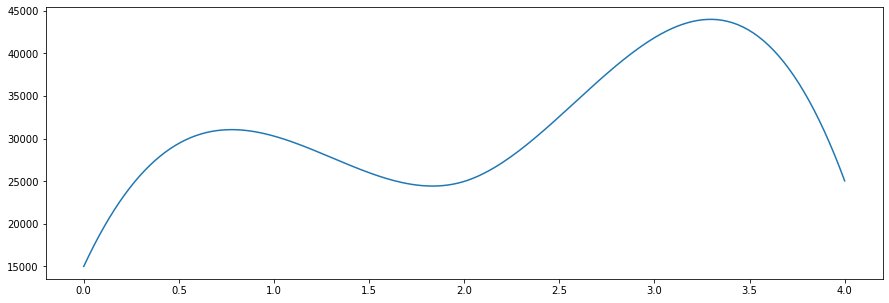

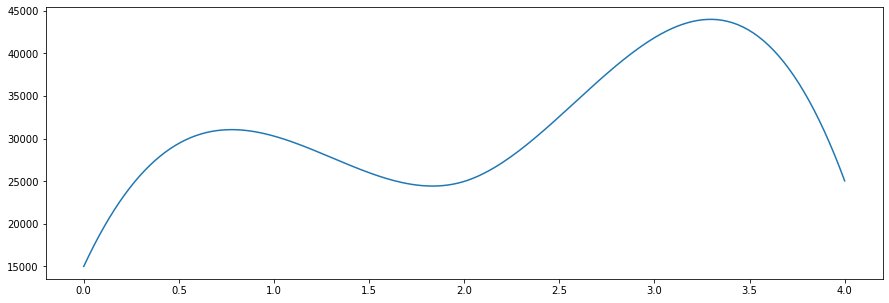

In [ ]:
# Plot
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
plt.rcParams['figure.figsize'] = [15, 5]

def plot_scenario(ids_scen_to_plot):
  x=list(range(len(demand)))
  xnew = np.linspace(x[0], x[-1], 300)
  spl = make_interp_spline(x, scenarios[id_scen_to_plot], k=3)  # type: BSpline
  power_smooth = spl(xnew)
  plt.plot(xnew, power_smooth)
  plt.show()

plot_scenario(1)
plot_scenario(100)


In [ ]:
output=np.zeros(shape=(n_power_types, n_periods))
for t in range(n_power_types):
  for p in range(n_periods):
    output[t,p]=gen_power[t,p].x

hydro=np.zeros(shape=(n_hydro_units, n_periods))

for h in range(n_hydro_units):
  for p in range(n_periods):
    hydro[h,p]=hydro_on[h,p].x

pumping_hydro=np.zeros(shape=(n_periods))
for p in range(n_periods):
  pumping_hydro[p]=pumping[p].x

In [ ]:
def satisfies_demand(demandp, output, hydro, pumping_hydro):
  for p in range(n_periods):
    sum_output=0
    for t in range(n_power_types):
      sum_output+=output[t, p]

    sum_hydro=0
    for h in range(n_hydro_units):
      sum_hydro+=hydro[h,p]*hydro_load[h]

    # print(sum_hydro)
    # print(sum_output)
    # print(demandp[p])
    # print(pumping_hydro[p])
    if sum_output+sum_hydro<demandp[p]+pumping_hydro[p]:
      return False
  return True

In [ ]:
satisfied=0
for i in range(len(scenarios)):
  if(satisfies_demand(scenarios[i], output, hydro, pumping_hydro)):
    satisfied+=1

print(f"The percentage of scenarios satisfied by the determinist solution is {(satisfied/len(scenarios))*100}%")

The percentage of scenarios satisfied by the determinist solution is 26.0%


## Question 3.4

For this, we just have to change the meet demand constraint and apply it to 90% of the cases.

In [ ]:
sample_train_size=int(0.9*len(scenarios))

In [ ]:
meet_demand_constr = model_2_2.addConstrs(gp.quicksum(gen_power[type_id, period_id] for type_id in range(n_power_types)) +
                               gp.quicksum(hydro_load[unit]*hydro_on[unit,period_id] for unit in range(n_hydro_units))
                               >= scenarios[s][period_id] + pumping[period_id]
                               for period_id in range(n_periods) for s in range(sample_train_size))
model_2_2.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1435 rows, 75 columns and 8315 nonzeros
Model fingerprint: 0x1c3ed18e
Variable types: 25 continuous, 50 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+03]
  Objective range  [4e+00, 9e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+04]

MIP start from previous solve produced solution with objective 1.15113e+06 (0.02s)
Loaded MIP start from previous solve with objective 1.15113e+06

Presolve removed 1370 rows and 5 columns
Presolve time: 0.01s
Presolved: 65 rows, 70 columns, 190 nonzeros
Variable types: 25 continuous, 45 integer (18 binary)

Root relaxation: objective 1.141064e+06, 34 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1141064.18    0 

In [ ]:
describe_model(model_2_2)

Costs: 1141868.8969292203


,Power type 0,N units on 0,Power type 1,N units on 1,Power type 2,N units on 2,Hydro unit 0,Hydro unit 1,Total gen power,Demand,Cost Base,Cost Additional,Pumping
0,10200.000000,12.0,6915.0,4.0,0.0,0.0,-0.0,-0.0,17115.000000,15000,134400.0,14937.000000,2115.0
1,13776.931773,12.0,17500.0,10.0,0.0,0.0,0.0,-0.0,31276.931773,30000,114000.0,40961.590636,0.0
2,10897.145393,12.0,17500.0,10.0,0.0,-0.0,0.0,0.0,28397.145393,25000,228000.0,47365.744717,0.0
3,23789.709221,12.0,17500.0,10.0,1500.0,1.0,0.0,1.0,44189.709221,40000,123000.0,101038.255327,0.0
4,13043.025521,12.0,17500.0,10.0,0.0,0.0,-0.0,1.0,31943.025521,27000,228000.0,73116.306250,0.0


**a) Costs**

About 1,146B€ vs 1.014B€, so around 132k€ of difference.


**b) Thermal production**

30GW average vs 27GW average over the periods.

**c) Hydro production**

Same generation.

**d) Pumping**

Exactly the same total of pumping (2115) but in the last model, it is all done in the beginning.

In [ ]:
#Let's reload new scenarios to not test the model on situations it trained for
scenarios=generate_scenarios(power_demand_by_period, cov, n_scen=300)

output=np.zeros(shape=(n_power_types, n_periods))
for t in range(n_power_types):
  for p in range(n_periods):
    output[t,p]=gen_power[t,p].x

hydro=np.zeros(shape=(n_hydro_units, n_periods))

for h in range(n_hydro_units):
  for p in range(n_periods):
    hydro[h,p]=hydro_on[h,p].x

pumping_hydro=np.zeros(shape=(n_periods))
for p in range(n_periods):
  pumping_hydro[p]=pumping[p].x

satisfied=0
for i in range(len(scenarios)):
  if(satisfies_demand(scenarios[i], output, hydro, pumping_hydro)):
    satisfied+=1

print(f"The percentage of scenarios satisfied by the determinist solution is {(satisfied/len(scenarios))*100}%")

The percentage of scenarios satisfied by the determinist solution is 98.33333333333333%


In [ ]:
sample_train_size=int(0.95*len(scenarios))
meet_demand_constr = model_2_2.addConstrs(gp.quicksum(gen_power[type_id, period_id] for type_id in range(n_power_types)) +
                               gp.quicksum(hydro_load[unit]*hydro_on[unit,period_id] for unit in range(n_hydro_units))
                               >= scenarios[s][period_id] + pumping[period_id]
                               for period_id in range(n_periods) for s in range(sample_train_size))
model_2_2.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1510 rows, 75 columns and 8765 nonzeros
Model fingerprint: 0xa4a8f7e4
Variable types: 25 continuous, 50 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e-03, 4e+03]
  Objective range  [4e+00, 9e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+04]
Presolve removed 1445 rows and 5 columns
Presolve time: 0.00s
Presolved: 65 rows, 70 columns, 190 nonzeros
Variable types: 25 continuous, 45 integer (18 binary)

Root relaxation: objective 1.150983e+06, 34 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1150983.45    0    7          - 1150983.45      -     -    0s
H    0     0                    1295989.5438 1150983.45  11.2%     -    0s
H    0     0                

In [ ]:
#Let's reload new scenarios to not test the model on situations it trained for
scenarios=generate_scenarios(power_demand_by_period, cov, n_scen=300)

output=np.zeros(shape=(n_power_types, n_periods))
for t in range(n_power_types):
  for p in range(n_periods):
    output[t,p]=gen_power[t,p].x

hydro=np.zeros(shape=(n_hydro_units, n_periods))

for h in range(n_hydro_units):
  for p in range(n_periods):
    hydro[h,p]=hydro_on[h,p].x

pumping_hydro=np.zeros(shape=(n_periods))
for p in range(n_periods):
  pumping_hydro[p]=pumping[p].x

satisfied=0
for i in range(len(scenarios)):
  if(satisfies_demand(scenarios[i], output, hydro, pumping_hydro)):
    satisfied+=1

print(f"The percentage of scenarios satisfied by the determinist solution is {(satisfied/len(scenarios))*100}%")

The percentage of scenarios satisfied by the determinist solution is 97.33333333333334%


We get similar results for the 95% reliability and the 90% reliability.